In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def ll4(x,b,c,d,e):
    '''This function is basically a copy of the LL.4 function from the R drc package with
     - b: hill slope
     - c: min response
     - d: max response
     - e: EC50'''
    return(c+(d-c)/(1+np.exp(b*(np.log(x)-np.log(e)))))

def pDose(x):
    '''This is just a helper function, to compute easily log transformed concentrations used in drug discovery'''
    return(-np.log10(1e-6*x))

In [23]:
alfabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
params = []

print("Geef het aantal stoffen in (max 26): ")
aantal_param = int(input())

for i in range(0, aantal_param):
    print("Geef voor stof " + alfabet[i] + " de waarde voor b in: ")
    b = float(input())
    print("Geef voor stof " + alfabet[i] + " de waarde voor c in: ")
    c = float(input())
    print("Geef voor stof " + alfabet[i] + " de waarde voor d in: ")
    d = float(input())
    print("Geef voor stof " + alfabet[i] + " de waarde voor e in: ")
    e = float(input())
    print("Geef voor stof " + alfabet[i] + " de waarde voor startDose in: ")
    startDose = float(input())
    print("Geef voor stof " + alfabet[i] + " de waarde voor nDose in: ")
    nDose = int(input())
    print("Geef voor stof " + alfabet[i] + " de waarde voor dilution in: ")
    dilution = int(input())
    params.append({'compound': alfabet[i], 'b' : b, 'c' : c, 'd' : d, 'e' : e,'startDose' : startDose, 'nDose': nDose, 'dilution' : dilution})

Geef het aantal stoffen in (max 26): 


 2


Geef voor stof A de waarde voor b in: 


 1


Geef voor stof A de waarde voor c in: 


 0


Geef voor stof A de waarde voor d in: 


 12


Geef voor stof A de waarde voor e in: 


 27.8


Geef voor stof A de waarde voor startDose in: 


 195.3


Geef voor stof A de waarde voor nDose in: 


 10


Geef voor stof A de waarde voor dilution in: 


 2


Geef voor stof B de waarde voor b in: 


 1


Geef voor stof B de waarde voor c in: 


 0


Geef voor stof B de waarde voor d in: 


 2


Geef voor stof B de waarde voor e in: 


 24.5


Geef voor stof B de waarde voor startDose in: 


 390.625


Geef voor stof B de waarde voor nDose in: 


 8


Geef voor stof B de waarde voor dilution in: 


 2


In [24]:
paramsCompound = [item['compound'] for item in params]

In [25]:
drData=[]
for curve in params:
    # generate base curve
    curData = pd.DataFrame(data={'compound':curve['compound'],
                                 'dose':curve['startDose']/np.power(curve['dilution'],range(curve['nDose']))})
    curData['logDose'] = pDose(curData.dose)
    curData['response'] = curData.dose.apply(lambda x: ll4(x,*[curve[i] for i in ['b','c','d','e']]))
    # generate replicates
    repData = []
    for i in range(5):
        rep = curData
        rep.response += 0.25*np.random.normal(len(rep.response))
        repData.append(rep.copy())
    repData = pd.concat(repData)
    drData.append(repData)
# assemble data
drData = pd.concat(drData)
drData

,compound,dose,logDose,response
0,A,195.300000,3.709298,3.967082
1,A,97.650000,4.010328,5.131015
2,A,48.825000,4.311358,6.825459
3,A,24.412500,4.612388,8.861063
4,A,12.206250,4.913418,10.810485
5,A,6.103125,5.214448,12.311589
6,A,3.051563,5.515478,13.284855
7,A,1.525781,5.816508,13.847444
8,A,0.762891,6.117538,14.151278
9,A,0.381445,6.418568,14.309364


In [26]:
compoundData = drData.groupby(['compound'])
fitData = []
for name,group in compoundData:
    fitCoefs, covMatrix = opt.curve_fit(ll4, group.dose, group.response)
    resids = group.response-group.dose.apply(lambda x: ll4(x,*fitCoefs))
    curFit = dict(zip(['b','c','d','e'],fitCoefs))
    curFit['compound']=name
    curFit['residuals']=sum(resids**2)
    fitData.append(curFit)
fitCompound = [ item['compound'] for item in fitData]

C:\Users\jemij\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


In [27]:
fitTable = pd.DataFrame(fitData).set_index('compound')
fitTable

,b,c,d,e,residuals
compound,,,,,
A,1.000000,7.643161,19.643161,27.800000,640.865047
B,1.000001,6.099450,8.099449,24.500009,366.600031


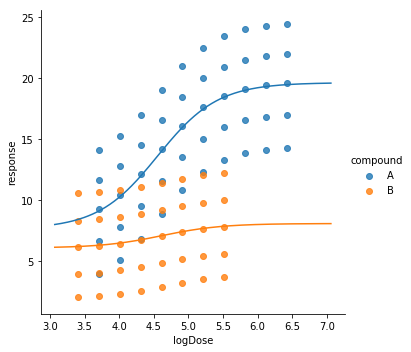

In [28]:
refDose = np.linspace(min(drData.logDose)*0.9,max(drData.logDose)*1.1,256)
refDose = (10**-refDose)*1e6
sns.lmplot('logDose','response',data=drData,hue='compound',fit_reg=False)

for fit in fitData:
    plt.plot([pDose(i) for i in refDose],[ll4(i,*[fit[i] for i in ['b','c','d','e']]) for i in refDose])